In [ ]:
# init
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
def draw_ROC_curve(pred_positive_label, y_data):
  fpr, tpr, thresholds = roc_curve(y_data, pred_positive_label)
  precisions, recalls, thresholds = roc_curve(y_data, pred_positive_label)
  plt.figure(figsize=(15, 5))
  plt.plot([0, 1], [0, 1], label='STR')
  plt.plot(fpr, tpr, label='ROC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()
  print('AUC:', roc_auc_score(y_data, pred_positive_label))

In [ ]:
def model_evaluation(y_data, predicted):
  print("MSE:", (mean_squared_error(y_data, predicted)))
  print("r2 score:", r2_score(y_data, predicted))
  print(classification_report(y_data, predicted))

In [ ]:
# get from file
df_weather = pd.read_csv('/content/train_processed.csv')
df_weather.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1,0.671702,-0.913809,-0.642199,-0.448815,-0.199457,0.636434,0.681269,-0.729397,-0.560901,-0.465291,1
1,2,2,1.043116,-1.798289,-1.350846,-1.259418,-0.956001,1.662224,0.847728,-1.032804,-0.685925,0.009629,1
2,3,3,1.856688,-1.232222,-1.504067,-1.496667,-2.109731,-0.902250,-1.593680,1.256536,-0.435876,-0.374349,1
3,4,4,-0.035752,-1.462187,-1.178472,-1.041939,-0.691210,1.662224,1.069675,-1.032804,-0.560901,1.393971,1
4,5,5,1.449902,-0.896120,-1.063556,-1.378043,-2.052990,-3.851394,-1.704654,-0.039837,-0.810950,0.302665,0


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3300 non-null   int64  
 1   day            3300 non-null   int64  
 2   pressure       3300 non-null   float64
 3   maxtemp        3300 non-null   float64
 4   temparature    3300 non-null   float64
 5   mintemp        3300 non-null   float64
 6   dewpoint       3300 non-null   float64
 7   humidity       3300 non-null   float64
 8   cloud          3300 non-null   float64
 9   sunshine       3300 non-null   float64
 10  winddirection  3300 non-null   float64
 11  windspeed      3300 non-null   float64
 12  rainfall       3300 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 335.3 KB


In [ ]:
# divide dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(df_weather.drop(columns=['day', 'id', 'rainfall']), df_weather['rainfall'], test_size=0.2, random_state=42)

In [ ]:
# fitting the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# evaluate model
print(model.predict(x_test))
print(model.score(x_test, y_test))

[1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 0 1 1 0 1 0 1 1 

In [ ]:
print(model.predict_proba(x_test))

[[0.08125401 0.91874599]
 [0.5889656  0.4110344 ]
 [0.07568217 0.92431783]
 ...
 [0.95683714 0.04316286]
 [0.10138104 0.89861896]
 [0.15848457 0.84151543]]


In [ ]:
model_evaluation(y_test, model.predict(x_test))

MSE: 0.15606060606060607
r2 score: 0.37573464590067585
              precision    recall  f1-score   support

           0       0.87      0.80      0.84       328
           1       0.82      0.89      0.85       332

    accuracy                           0.84       660
   macro avg       0.85      0.84      0.84       660
weighted avg       0.85      0.84      0.84       660



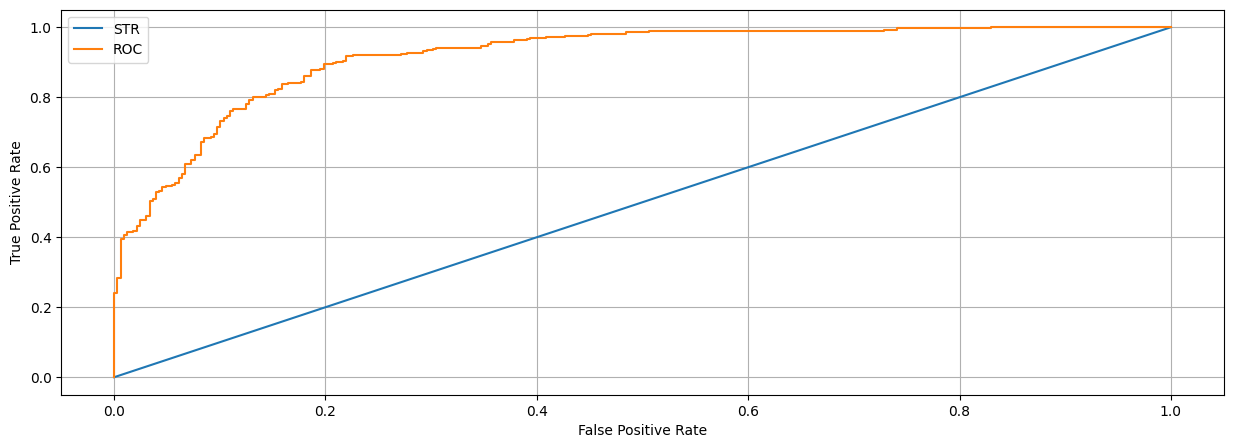

AUC: 0.9160299735527475


In [ ]:
draw_ROC_curve(model.predict_proba(x_test)[:, 1], y_test)

In [ ]:
df_weather_test_input = pd.read_csv('/content/test_processed.csv').drop(columns=['id', 'day'])
df_weather_test_output = pd.read_csv('/content/sample_submission.csv').drop(columns='id')
res = df_weather_test_output = pd.read_csv('/content/sample_submission.csv').drop(columns='rainfall')

In [ ]:
r = []
for i in model.predict_proba(df_weather_test_input):
  r.append(i[1])

In [ ]:
res['rainfall'] = r
res.to_csv('submission.csv', index=False)